In [64]:
using LinearAlgebra
using SparseArrays
using Plots

In [43]:
n = 100
M = 29
λ =  [i+10 for i in 1:n]
A_ = randn(n, n)
A = UpperTriangular(A_) - diagm(diag(A_)) + diagm(λ)
b = randn(n, 1);

In [46]:
# Build up first Krylov matrices, using renormalization after each matrix-vector multiplication
Km = zeros(n, M+1)
Km[:, 1] = b
for m in 1:M
    v = A * Km[:, m]
    Km[:, m+1] = v / norm(v)
end

In [50]:
res = zeros(M+1, 1)
for m in 1:M+1
    km_ = Km[:, 1:m]
    z = (A * km_) \ b
    x = km_ * z # Lemma 8.4.1, p.332
    res[m] = norm(b - A * x)
end

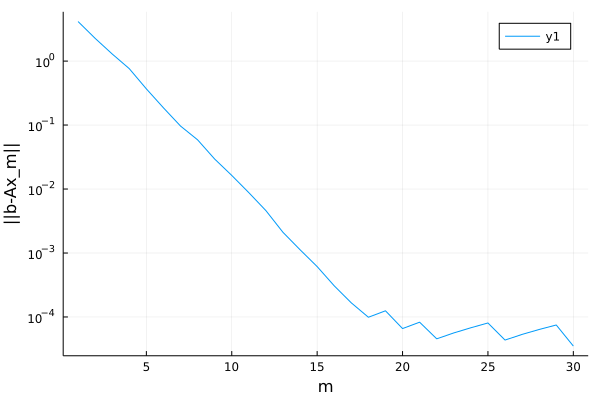

In [63]:
# The columns of Km are becoming near-parallel → numerical cancellation
plot(1:M+1, res, yaxis=:log, xlabel=:"m", ylabel=:"||b-Ax_m||")